#**Setup**

**Dataset Overview**

Numeric: annual_income, debt_to_income_ratio, credit_score, loan_amount, interest_rate

Categorical: gender, marital_status, education_level, employment_status, loan_purpose, grade_subgrade

Target: loan_paid_back

Id: id

**Get the Data**

In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/Loan_Payback_ML_Kaggle/Datasets/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Loan_Payback_ML_Kaggle/Datasets/test.csv')

train.head()


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [ ]:
#Basic info:
train.info()
train.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994,593994,593994,593994,593994,593994,593994.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,4,5,5,8,30,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Female,Single,Bachelor's,Employed,Debt consolidation,C3,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,306175,288843,279606,450645,324695,58695,NaN
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,NaN,NaN,NaN,NaN,NaN,NaN,0.798820
std,171471.442235,26711.942078,0.068573,55.424956,6926.530568,2.008959,NaN,NaN,NaN,NaN,NaN,NaN,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


**Class Balance Visualization**

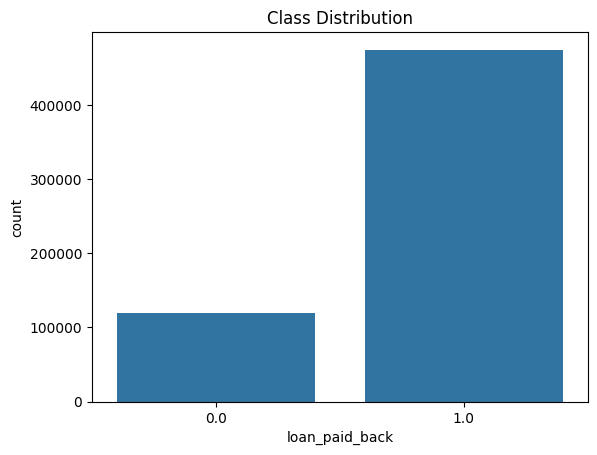

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=train["loan_paid_back"])
plt.title("Class Distribution")
plt.show()


**Numeric Feature Distributions**

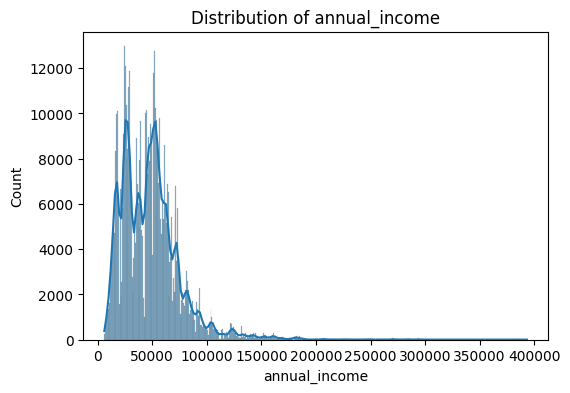

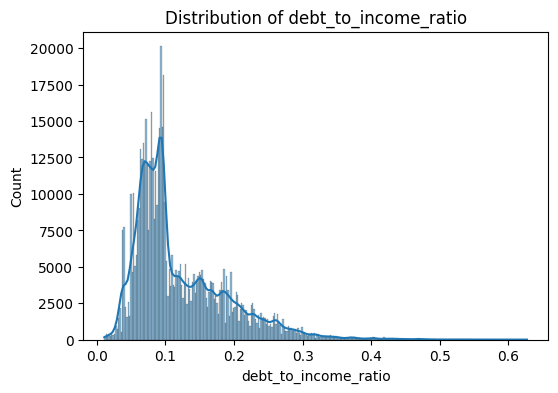

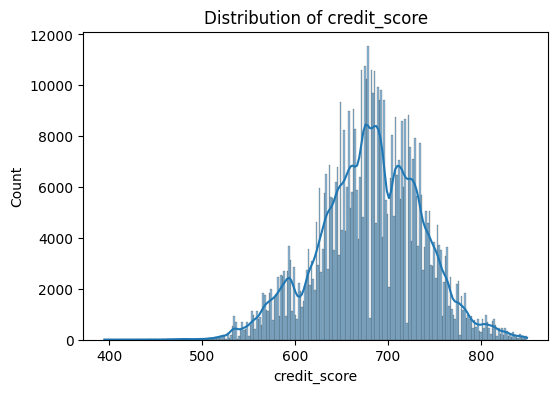

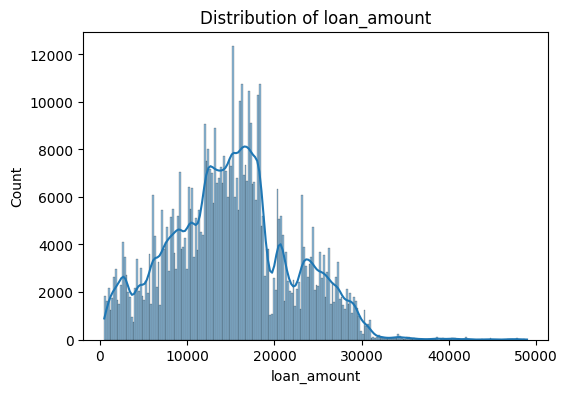

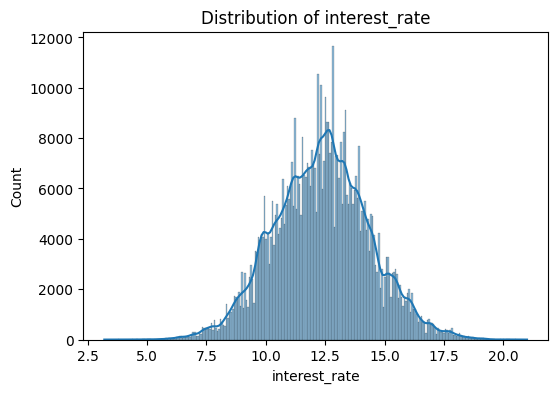

In [ ]:
numeric_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score',
                'loan_amount', 'interest_rate']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(train[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


**Numeric Features vs Target**

This tells you how each numeric variable affects repayment probability.

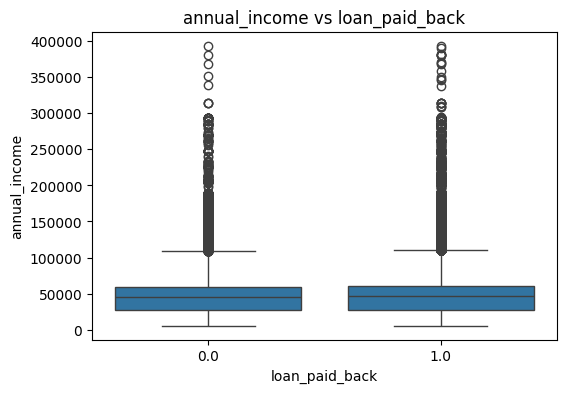

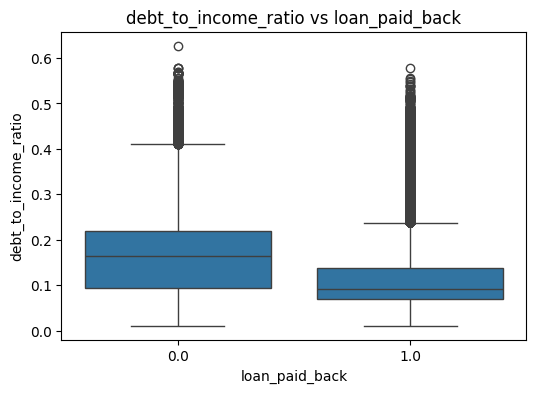

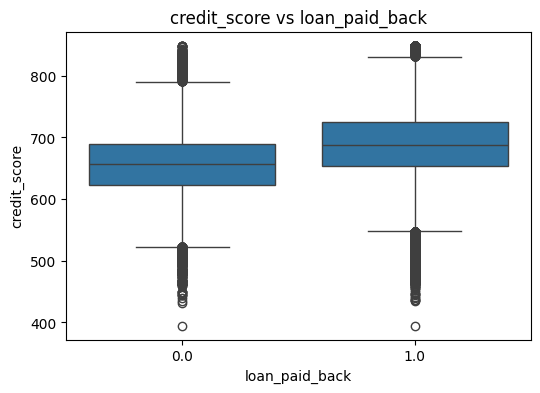

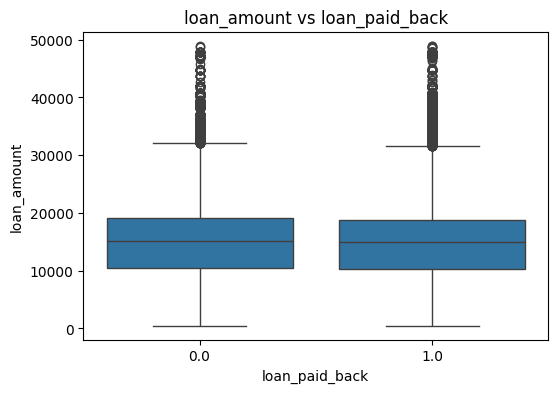

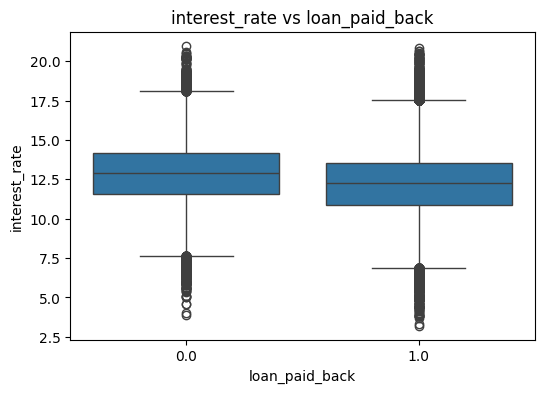

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='loan_paid_back', y=col, data=train)
    plt.title(f"{col} vs loan_paid_back")
    plt.show()


1. annual_income
Distribution

Strong right-skew with a long tail.

Most borrowers fall between $20,000 and $80,000.

A small number of high-income outliers extend up to $400,000.

Relationship with loan_paid_back

Median annual income for borrowers who paid back (1) is slightly higher than for those who did not (0).

Both groups show similar overall distribution patterns and similar outlier profiles.

The median difference is present but small.

Interpretation

Higher-income borrowers tend to repay more reliably.

However, annual_income by itself provides only weak separation between classes.

This feature contributes predictive value but is not individually strong.

Recommended Feature Engineering

Apply a log transformation to address skewness.

Create income-to-loan ratios, which tend to carry more predictive power.

2. debt_to_income_ratio
Distribution

Right-skewed but tightly concentrated for most borrowers.

The majority of values fall between 5% and 20%.

Only a few borrowers exceed 40% or 60%.

Relationship with loan_paid_back

Clear separation between classes.

Borrowers who default have noticeably higher debt-to-income ratios.

Borrowers who repay tend to have smaller ratios with tighter spread around the median.

Interpretation

A high debt-to-income ratio indicates a financially stretched borrower.

This is one of the strongest numerical predictors of loan repayment.

Recommended Feature Engineering

Keep the raw feature as-is.

Add interactions such as:

debt_to_income_ratio × interest_rate

debt_to_income_ratio × loan_amount

Such combinations often strengthen boosting models.

3. credit_score
Distribution

Nearly bell-shaped and symmetric.

Centered around 680–720 with a meaningful spread from 400 to 850.

Relationship with loan_paid_back

Strong class separation.

Defaults generally exhibit lower median credit scores (around 650–670).

Non-defaults show higher median scores (around 690–710).

The distribution for the repaid class is noticeably shifted to the right.

Interpretation

Credit score is a very strong predictor of repayment probability.

Higher credit scores consistently correlate with higher repayment likelihood.

This will likely be one of the most influential features in all model families, including logistic regression, XGBoost, and SHAP-based explainability.

Recommended Feature Engineering

Create binned categories such as “Poor,” “Fair,” “Good,” “Very Good,” and “Excellent.”

Engineer ratio features such as:

credit_score / loan_amount

credit_score × income_to_loan

Boosting models often benefit from such interactions.

4. loan_amount
Distribution

Slight right-skew.

Heavy clustering around $8,000–$20,000.

A long tail extends up to ~$50,000.

Relationship with loan_paid_back

Very similar distributions for both classes.

Slight indication that larger loan amounts are associated with higher default rates, but the effect is weak.

Interpretation

Loan amount alone does not strongly differentiate between repayers and defaulters.

Interactions, however, reveal more meaningful structure:

High loan_amount combined with low income increases default probability.

High loan_amount combined with high interest_rate often indicates risk.

Loan_amount becomes much more useful when expressed relative to other features.

Recommended Feature Engineering

loan_amount / annual_income

loan_amount × interest_rate

loan_amount / credit_score

5. interest_rate
Distribution

Symmetric, unimodal distribution.

Centered around 12–13%.

Spread from roughly 3% to 20%.

Relationship with loan_paid_back

Clear separation between classes.

Higher interest rates appear more frequently among borrowers who default.

Lower interest rates are more common among borrowers who repay.

Interpretation

Interest rate effectively encodes the lender’s internal risk assessment.

It is a highly predictive feature and strongly influences model performance.

Recommended Feature Engineering

Combine interest_rate with:

loan_amount

debt_to_income_ratio

credit_score

These paired interactions help models capture risk gradients.

**Summary of Numerical Predictive Power (Ranked)**
Strongest Predictors

credit_score

debt_to_income_ratio

interest_rate

These variables show the most distinct separation between repayers and defaulters and exhibit monotonic relationships with the target.

Moderately Useful Predictors

annual_income

loan_amount

These variables have limited predictive power in isolation but become much more informative through ratio features or interactions with other variables.

**Final Insights**

credit_score, debt_to_income_ratio, and interest_rate emerge as the dominant numerical predictors of loan repayment behavior. These features show clear, interpretable differences between repayment and default patterns and contribute strongly to both linear and tree-based models.

annual_income and loan_amount, on the other hand, demonstrate only modest separation between classes when used individually. Their predictive value increases significantly when expressed as ratios or combined with other variables. This emphasizes the importance of engineered features and interactions in credit risk modeling.

**Define categorical columns**

In [ ]:
cat_cols = [
    "gender",
    "marital_status",
    "education_level",
    "employment_status",
    "loan_purpose",
    "grade_subgrade",
]


**Basic frequency tables for each categorical variable**

In [ ]:
for col in cat_cols:
    print(f"\n=== {col} value counts ===")
    print(train[col].value_counts(dropna=False))



=== gender value counts ===
gender
Female    306175
Male      284091
Other       3728
Name: count, dtype: int64

=== marital_status value counts ===
marital_status
Single      288843
Married     277239
Divorced     21312
Widowed       6600
Name: count, dtype: int64

=== education_level value counts ===
education_level
Bachelor's     279606
High School    183592
Master's        93097
Other           26677
PhD             11022
Name: count, dtype: int64

=== employment_status value counts ===
employment_status
Employed         450645
Unemployed        62485
Self-employed     52480
Retired           16453
Student           11931
Name: count, dtype: int64

=== loan_purpose value counts ===
loan_purpose
Debt consolidation    324695
Other                  63874
Car                    58108
Home                   44118
Education              36641
Business               35303
Medical                22806
Vacation                8449
Name: count, dtype: int64

=== grade_subgrade value counts 

**Distribution plots of each categorical variable**

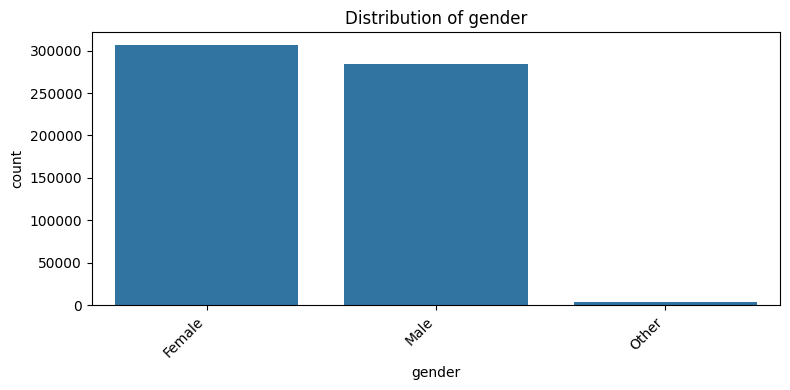

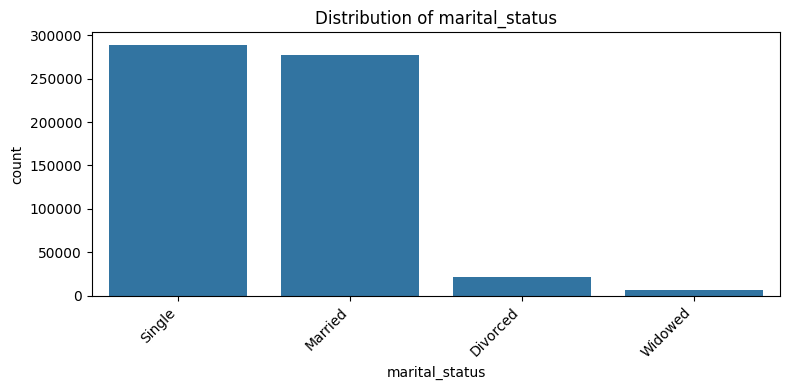

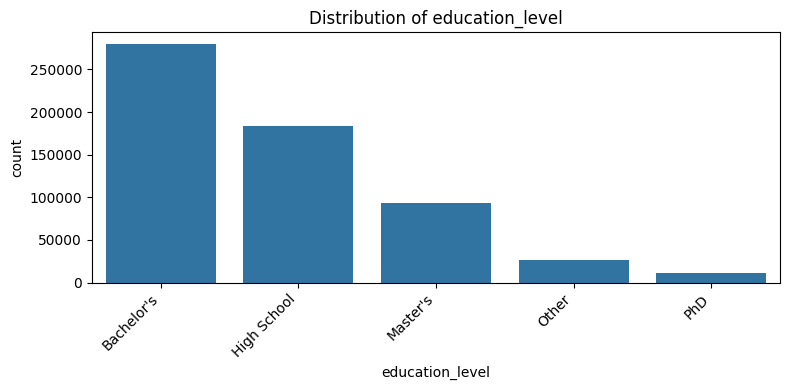

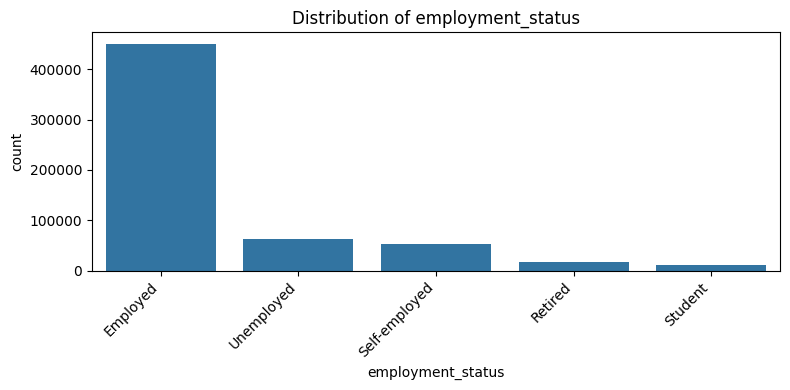

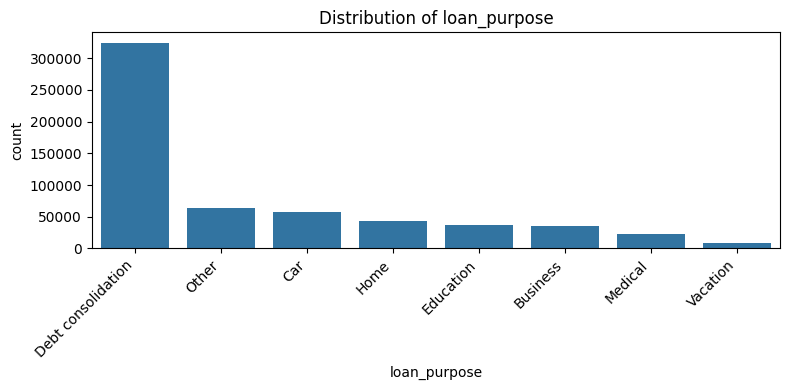

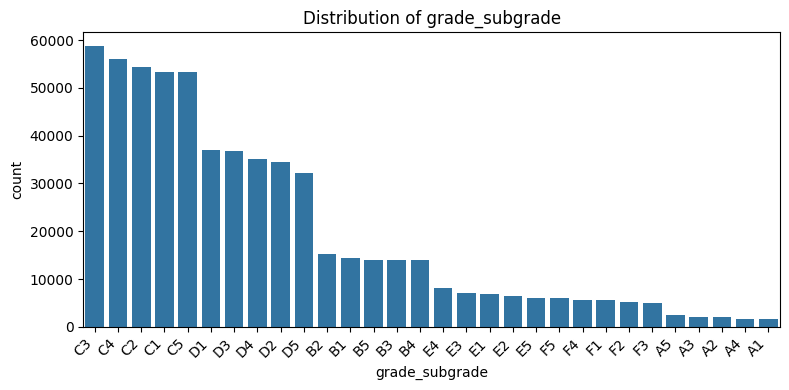

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


**Target rate (P(loan_paid_back = 1)) per category**


=== gender vs loan_paid_back (mean repayment rate) ===
gender
Female    0.801708
Male      0.795752
Other     0.795333
Name: loan_paid_back, dtype: float64


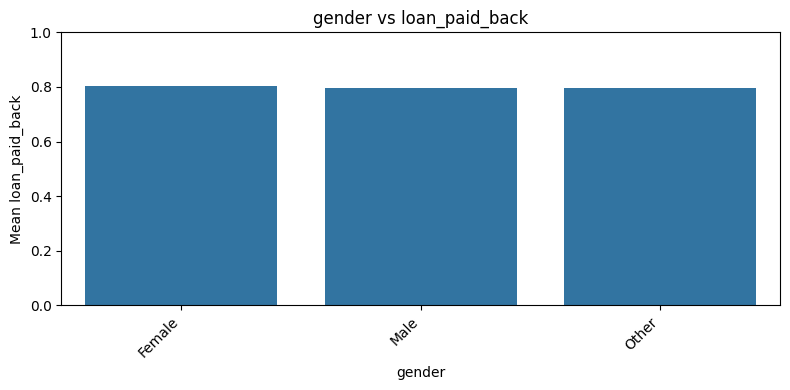


=== marital_status vs loan_paid_back (mean repayment rate) ===
marital_status
Married     0.799144
Single      0.798873
Divorced    0.796640
Widowed     0.789848
Name: loan_paid_back, dtype: float64


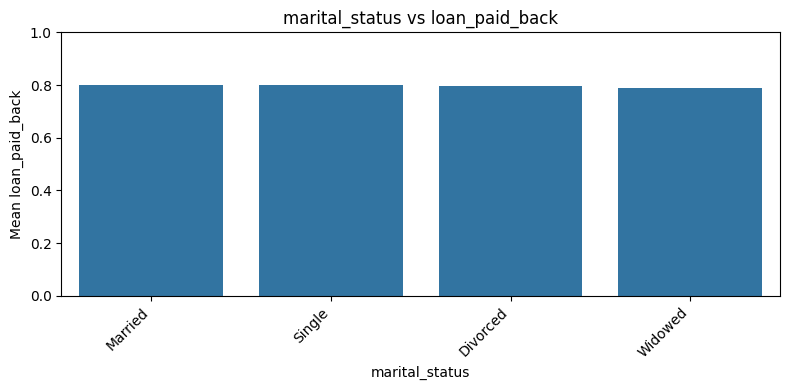


=== education_level vs loan_paid_back (mean repayment rate) ===
education_level
PhD            0.830067
High School    0.809698
Other          0.802789
Master's       0.802346
Bachelor's     0.788892
Name: loan_paid_back, dtype: float64


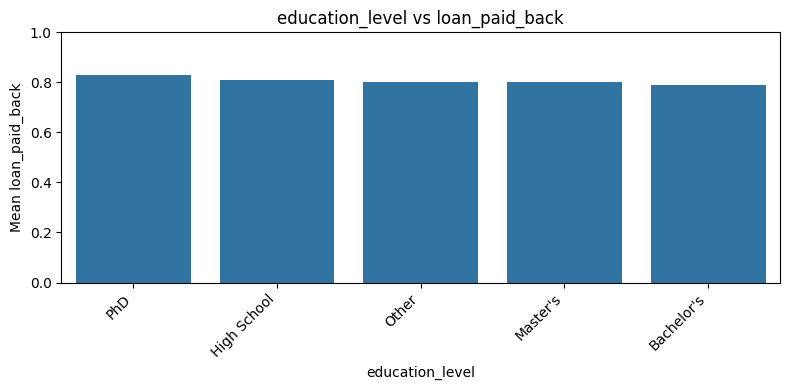


=== employment_status vs loan_paid_back (mean repayment rate) ===
employment_status
Retired          0.997204
Self-employed    0.898457
Employed         0.894145
Student          0.263515
Unemployed       0.077619
Name: loan_paid_back, dtype: float64


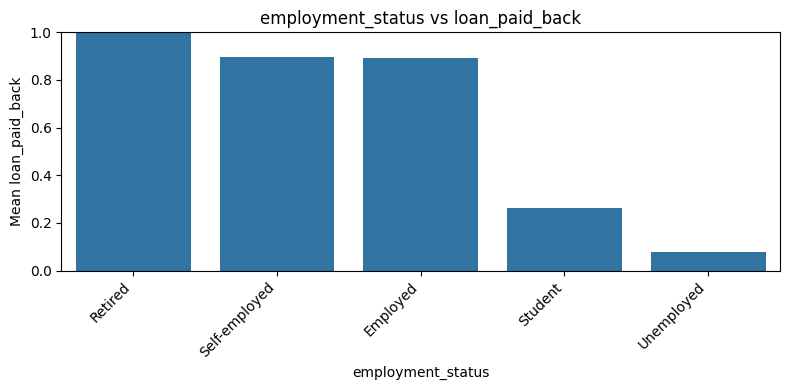


=== loan_purpose vs loan_paid_back (mean repayment rate) ===
loan_purpose
Home                  0.823224
Business              0.813104
Other                 0.802377
Car                   0.800630
Debt consolidation    0.796911
Vacation              0.796071
Medical               0.778085
Education             0.777053
Name: loan_paid_back, dtype: float64


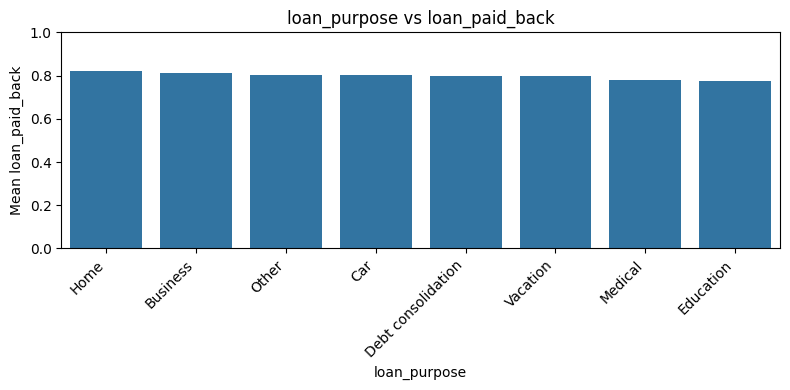


=== grade_subgrade vs loan_paid_back (mean repayment rate) ===
grade_subgrade
A4    0.957084
A3    0.955470
A2    0.952924
A1    0.952500
A5    0.944962
B3    0.940040
B2    0.937430
B5    0.934204
B4    0.931758
B1    0.916341
C1    0.860090
C2    0.851165
C5    0.846259
C4    0.843987
C3    0.836000
D1    0.731886
D2    0.720957
D4    0.714733
D5    0.713000
D3    0.695972
E5    0.669461
E2    0.662743
E1    0.652010
E4    0.649577
E3    0.641837
F5    0.639314
F4    0.637037
F1    0.624503
F2    0.617721
F3    0.604093
Name: loan_paid_back, dtype: float64


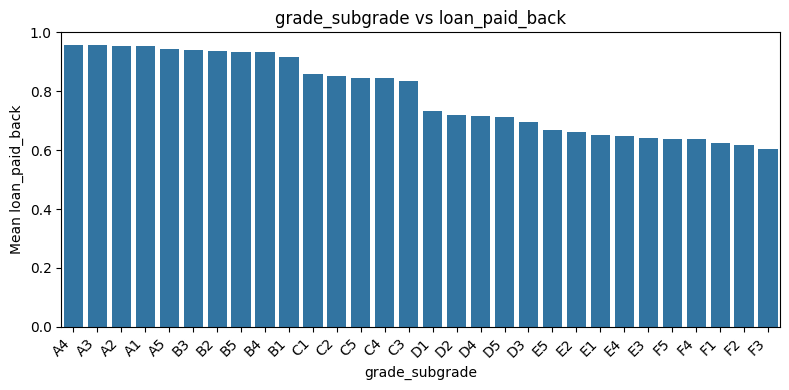

In [ ]:
for col in cat_cols:
    print(f"\n=== {col} vs loan_paid_back (mean repayment rate) ===")
    group = train.groupby(col)["loan_paid_back"].mean().sort_values(ascending=False)
    print(group)

    plt.figure(figsize=(8,4))
    sns.barplot(x=group.index, y=group.values)
    plt.ylabel("Mean loan_paid_back")
    plt.title(f"{col} vs loan_paid_back")
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


**Crosstab (optional but useful for some variables)**

In [ ]:
for col in cat_cols:
    print(f"\n=== Crosstab: {col} x loan_paid_back (row-normalized) ===")
    ct = pd.crosstab(train[col], train["loan_paid_back"], normalize="index")
    print(ct)



=== Crosstab: gender x loan_paid_back (row-normalized) ===
loan_paid_back       0.0       1.0
gender                            
Female          0.198292  0.801708
Male            0.204248  0.795752
Other           0.204667  0.795333

=== Crosstab: marital_status x loan_paid_back (row-normalized) ===
loan_paid_back       0.0       1.0
marital_status                    
Divorced        0.203360  0.796640
Married         0.200856  0.799144
Single          0.201127  0.798873
Widowed         0.210152  0.789848

=== Crosstab: education_level x loan_paid_back (row-normalized) ===
loan_paid_back        0.0       1.0
education_level                    
Bachelor's       0.211108  0.788892
High School      0.190302  0.809698
Master's         0.197654  0.802346
Other            0.197211  0.802789
PhD              0.169933  0.830067

=== Crosstab: employment_status x loan_paid_back (row-normalized) ===
loan_paid_back          0.0       1.0
employment_status                    
Employed           

Categorical Variable Analysis

The dataset contains six categorical variables:

gender

marital_status

education_level

employment_status

loan_purpose

grade_subgrade

For each, we analyze:

Category distribution

Relationship with repayment probability (loan_paid_back)

Interpretation of predictive value

Feature engineering recommendations

1. gender
Distribution

Female and Male categories dominate the dataset with nearly equal proportions.

“Other” is extremely rare.

Target Relationship

Repayment rates across all gender categories are nearly identical (~0.79–0.80).
There is no meaningful separation between the groups.

Interpretation

Gender does not contribute discriminative power.

It will have very low feature importance in any model.

Should be included for completeness but not expected to improve performance.

Feature Engineering

Simple One-Hot Encoding is sufficient.

No transformation, grouping, or interaction is needed.

2. marital_status
Distribution

Majority are Single or Married.

Divorced and Widowed groups are smaller.

Target Relationship

Repayment rates are almost identical across all marital groups (~0.79–0.80).
There is no strong predictive signal.

Interpretation

Marital status does not meaningfully separate repayers from defaulters.

Weak predictor on its own.

Feature Engineering

One-Hot Encode as-is.

Grouping does not provide benefit.

Interactions (e.g., marital_status × income) may give tiny improvements but not necessary.

3. education_level
Distribution

Bachelor’s is the largest category.

Followed by High School and Master’s.

PhD and “Other” are smaller groups.

Target Relationship

Repayment rates across all education levels are very similar (~0.79–0.83).
Only slight upward differences for PhD and High School, but not significant.

Interpretation

Education adds minimal predictive value.

Differences are too small to meaningfully affect model performance.

Feature Engineering

One-Hot Encoding is enough.

Optional: Combine Master’s + PhD → “Higher Education”, but not required.

4. employment_status (Strong Predictor)
Distribution

Employed is the dominant category.

Self-employed and Unemployed represent smaller but important groups.

Student and Retired are minority categories.

Target Relationship

This variable shows clear and strong class separation:

Retired ≈ 1.00

Self-employed ≈ 0.90

Employed ≈ 0.90

Student ≈ 0.27

Unemployed ≈ 0.08

Interpretation

One of the strongest categorical predictors.

Very strong indicator of repayment likelihood.

Captures economic stability of the borrower.

Feature Engineering

One-Hot Encode employment_status.

Additionally create binary risk features:

is_unemployed

is_student

is_retired

Interaction features with loan_amount, DTI, or credit_score can help tree models.

5. loan_purpose
Distribution

Debt consolidation dominates (very large single category).

Other purposes (Car, Home, Business, Medical, Education, Vacation) form smaller but substantial groups.

Target Relationship

Repayment rates cluster tightly between 0.77–0.82, with minor differences:

Home, Business, Other → slightly higher repayment

Medical, Education → slightly lower repayment

Interpretation

loan_purpose is a weak predictor.

Useful only for subtle signal or when combined with other variables.

Feature Engineering

One-Hot Encode loan_purpose.

Consider merging rare categories.

Useful interaction features:

purpose × loan_amount

purpose × interest_rate

purpose × credit_score

6. grade_subgrade (Extremely Strong Predictor)
Distribution

C and D subgrades dominate the dataset.

A-level and F-level grades are rare.

Wide spread across ~30 unique subgrades.

Target Relationship

This variable shows a clean, monotonic, strongly predictive pattern:

A-grade subgrades: ~0.95–0.97 repayment

B-grade subgrades: ~0.90–0.93

C-grade subgrades: ~0.84–0.87

D-grade subgrades: ~0.72–0.77

E-grade subgrades: ~0.65–0.70

F-grade subgrades: ~0.61–0.64

Interpretation

This is one of the strongest features in the entire dataset.

grade_subgrade almost directly represents the lender’s internal risk rating.

Highly predictive for all modeling techniques (LR, XGB, NN).

Feature Engineering

Highly recommended:

Option A — Split into two numerical variables:

grade_letter (A–G → encode ordinally as 1–7)

subgrade_number (1–5)

Example:

C3 → grade_letter=3, subgrade_number=3

This preserves ordinal meaning and reduces sparse encoding.

Option B — Map to an ordinal risk score

Assign a numeric rank based on empirical repayment rate.

Option C — One-Hot Encode all 30 subgrades

Works well for tree-based models but increases dimensionality.

Best choice: Option A + Option C for boosting models.

Overall Summary
Strongest categorical predictors

grade_subgrade

employment_status

These should significantly improve model performance.

Moderate predictors

loan_purpose

Weak predictors

education_level

marital_status

gender

These should be included but will contribute minimal predictive value.

**Deterministic Feature engineering code – numerical + categorical**

**Base column lists**

In [ ]:
num_cols = [
    "annual_income",
    "debt_to_income_ratio",
    "credit_score",
    "loan_amount",
    "interest_rate",
]

cat_cols = [
    "gender",
    "marital_status",
    "education_level",
    "employment_status",
    "loan_purpose",
    "grade_subgrade",
]


**Numerical feature engineering**

In [ ]:
import numpy as np

print("=== Starting Numerical Feature Engineering ===")

# Log transforms to reduce skew
train["log_annual_income"] = np.log1p(train["annual_income"])
test["log_annual_income"]  = np.log1p(test["annual_income"])
print("Created 'log_annual_income'")

train["log_loan_amount"] = np.log1p(train["loan_amount"])
test["log_loan_amount"]  = np.log1p(test["loan_amount"])
print("Created 'log_loan_amount'")

# Ratio features
train["income_to_loan"] = train["annual_income"] / (train["loan_amount"] + 1e-6)
test["income_to_loan"]  = test["annual_income"] / (test["loan_amount"] + 1e-6)
print("Created 'income_to_loan'")

train["credit_to_loan"] = train["credit_score"] / (train["loan_amount"] + 1e-6)
test["credit_to_loan"]  = test["credit_score"] / (test["loan_amount"] + 1e-6)
print("Created 'credit_to_loan'")

# Interaction features
train["dti_x_interest"] = train["debt_to_income_ratio"] * train["interest_rate"]
test["dti_x_interest"]  = test["debt_to_income_ratio"] * test["interest_rate"]
print("Created 'dti_x_interest'")

train["loan_x_rate"] = train["loan_amount"] * train["interest_rate"]
test["loan_x_rate"]  = test["loan_amount"] * test["interest_rate"]
print("Created 'loan_x_rate'")

print("=== Numerical Feature Engineering Completed ===")


=== Starting Numerical Feature Engineering ===
Created 'log_annual_income'
Created 'log_loan_amount'
Created 'income_to_loan'
Created 'credit_to_loan'
Created 'dti_x_interest'
Created 'loan_x_rate'
=== Numerical Feature Engineering Completed ===


In [ ]:
num_features = num_cols + [
    "log_annual_income",
    "log_loan_amount",
    "income_to_loan",
    "credit_to_loan",
    "dti_x_interest",
    "loan_x_rate",
]


**Categorical feature engineering**

Split grade_subgrade into grade and subgrade

In [ ]:
print("=== Starting Categorical Feature Engineering (Grade/Subgrade) ===")

# Extract grade letter (A–F)
train["grade_letter"] = train["grade_subgrade"].str[0]
test["grade_letter"]  = test["grade_subgrade"].str[0]
print("Created 'grade_letter' from 'grade_subgrade'")

# Extract subgrade number (1–5)
train["subgrade_number"] = train["grade_subgrade"].str[1].astype(int)
test["subgrade_number"]  = test["grade_subgrade"].str[1].astype(int)
print("Created 'subgrade_number' from 'grade_subgrade'")

# Ordinal encoding for grade letters
grade_map = {"A": 6, "B": 5, "C": 4, "D": 3, "E": 2, "F": 1}
train["grade_letter_ord"] = train["grade_letter"].map(grade_map)
test["grade_letter_ord"]  = test["grade_letter"].map(grade_map)
print("Created 'grade_letter_ord' (ordinal numeric score for grade)")

print("=== Categorical Feature Engineering Completed ===")


=== Starting Categorical Feature Engineering (Grade/Subgrade) ===
Created 'grade_letter' from 'grade_subgrade'
Created 'subgrade_number' from 'grade_subgrade'
Created 'grade_letter_ord' (ordinal numeric score for grade)
=== Categorical Feature Engineering Completed ===


Risk flags from employment_status

In [ ]:
print("=== Starting Employment Risk Flag Engineering ===")

train["is_unemployed"] = (train["employment_status"] == "Unemployed").astype(int)
test["is_unemployed"]  = (test["employment_status"] == "Unemployed").astype(int)
print("Created 'is_unemployed' indicator")

train["is_student"] = (train["employment_status"] == "Student").astype(int)
test["is_student"]  = (test["employment_status"] == "Student").astype(int)
print("Created 'is_student' indicator")

train["is_retired"] = (train["employment_status"] == "Retired").astype(int)
test["is_retired"]  = (test["employment_status"] == "Retired").astype(int)
print("Created 'is_retired' indicator")

print("=== Employment Risk Flag Engineering Completed ===")


=== Starting Employment Risk Flag Engineering ===
Created 'is_unemployed' indicator
Created 'is_student' indicator
Created 'is_retired' indicator
=== Employment Risk Flag Engineering Completed ===


Final categorical list for one-hot encoding

In [ ]:
cat_features = [
    "gender",
    "marital_status",
    "education_level",
    "employment_status",
    "loan_purpose",
    "grade_letter",      # instead of full grade_subgrade
    # you could also keep "grade_subgrade" itself, but it's sparse
]


In [ ]:
print("=== All Deterministic Feature Engineering Steps Completed ===")
print("New Numerical Features:",
      ["log_annual_income", "log_loan_amount", "income_to_loan",
       "credit_to_loan", "dti_x_interest", "loan_x_rate"])

print("New Categorical Features:",
      ["grade_letter", "subgrade_number", "grade_letter_ord"])

print("New Risk Flags:",
      ["is_unemployed", "is_student", "is_retired"])


=== All Deterministic Feature Engineering Steps Completed ===
New Numerical Features: ['log_annual_income', 'log_loan_amount', 'income_to_loan', 'credit_to_loan', 'dti_x_interest', 'loan_x_rate']
New Categorical Features: ['grade_letter', 'subgrade_number', 'grade_letter_ord']
New Risk Flags: ['is_unemployed', 'is_student', 'is_retired']


**Train–Validation Split**

In [ ]:
from sklearn.model_selection import train_test_split

target_col = "loan_paid_back"

X = train.drop(columns=[target_col])
y = train[target_col]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)


Train shape: (475195, 24) (475195,)
Validation shape: (118799, 24) (118799,)


**Define Feature Lists**

In [ ]:
# Original numerical features
base_num_features = [
    "annual_income",
    "debt_to_income_ratio",
    "credit_score",
    "loan_amount",
    "interest_rate",
]

# Engineered numerical features (from previous step)
engineered_num_features = [
    "log_annual_income",
    "log_loan_amount",
    "income_to_loan",
    "credit_to_loan",
    "dti_x_interest",
    "loan_x_rate",
    "grade_letter_ord",
    "subgrade_number",
    "is_unemployed",
    "is_student",
    "is_retired",
]

num_features = base_num_features + engineered_num_features

# Categorical features (for one-hot encoding)
cat_features = [
    "gender",
    "marital_status",
    "education_level",
    "employment_status",
    "loan_purpose",
    "grade_letter",   # derived from grade_subgrade
]

print("Numerical features:", num_features)
print("Categorical features:", cat_features)


Numerical features: ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate', 'log_annual_income', 'log_loan_amount', 'income_to_loan', 'credit_to_loan', 'dti_x_interest', 'loan_x_rate', 'grade_letter_ord', 'subgrade_number', 'is_unemployed', 'is_student', 'is_retired']
Categorical features: ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_letter']


**Preprocessing: Scaling + One-Hot Encoding**

Now we build a preprocessing pipeline that:

Standard-scales numeric variables (important for Logistic Regression and NN)

One-hot encodes categorical variables

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # kept for safety, though you have no missing values

# Numeric pipeline: (optional imputer) + scaler
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline: (optional imputer) + one-hot encoder
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features),
    ],
    remainder="drop"  # drop other columns if any
)

print("Preprocessing pipeline is ready.")


Preprocessing pipeline is ready.


**Model Pipelines**

Now we create three separate pipelines:

Logistic Regression (baseline linear model)

XGBoost (strong boosting model)

MLPClassifier (simple neural network)

All three will share the same preprocessor defined above.

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

log_reg_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(
        max_iter=500,
        class_weight="balanced",
        n_jobs=-1,
        solver="lbfgs"
    ))
])

log_reg_clf.fit(X_train, y_train)

y_val_proba_lr = log_reg_clf.predict_proba(X_val)[:, 1]
auc_lr = roc_auc_score(y_val, y_val_proba_lr)
print("Logistic Regression ROC-AUC:", auc_lr)


Logistic Regression ROC-AUC: 0.9106418010321566


**XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier

# class imbalance handling
pos = y_train.sum()
neg = len(y_train) - pos
scale_pos_weight = neg / pos

xgb_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="auc",
        n_jobs=-1,
        scale_pos_weight=scale_pos_weight,
        random_state=42
    ))
])

xgb_clf.fit(X_train, y_train)

y_val_proba_xgb = xgb_clf.predict_proba(X_val)[:, 1]
auc_xgb = roc_auc_score(y_val, y_val_proba_xgb)
print("XGBoost ROC-AUC:", auc_xgb)


XGBoost ROC-AUC: 0.9194110832035873


**Neural Network (MLPClassifier)**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation="relu",
        solver="adam",
        alpha=1e-4,
        batch_size=256,
        max_iter=30,
        random_state=42
    ))
])

mlp_clf.fit(X_train, y_train)

y_val_proba_mlp = mlp_clf.predict_proba(X_val)[:, 1]
auc_mlp = roc_auc_score(y_val, y_val_proba_mlp)
print("MLPClassifier ROC-AUC:", auc_mlp)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier ROC-AUC: 0.9081328363151646


**Grid Search with Cross-Validation for XGB**

Now we’ll:

Define a base XGB model

Set up a reasonable hyperparameter grid

Run GridSearchCV with scoring='roc_auc' and cv=3

Print best params and best CV ROC–AUC

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

print("=== Hyperparameter Tuning: XGBoost with GridSearchCV + CV ===")

# Compute scale_pos_weight for imbalance
pos = y_train.sum()
neg = len(y_train) - pos
scale_pos_weight = neg / pos
print("scale_pos_weight:", scale_pos_weight)

# Base XGB model (parameters we won't change in this grid)
xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    tree_method="hist"  # faster on larger datasets if supported
)

# Full pipeline: preprocessing + model
xgb_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb_base)
])

# Hyperparameter grid (kept small but meaningful)
param_grid = {
    "model__n_estimators":   [300, 500, 700],
    "model__max_depth":      [3, 4, 5],
    "model__learning_rate":  [0.03, 0.05],
    "model__subsample":      [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0],
}

print("Number of combinations:",
      len(param_grid["model__n_estimators"]) *
      len(param_grid["model__max_depth"]) *
      len(param_grid["model__learning_rate"]) *
      len(param_grid["model__subsample"]) *
      len(param_grid["model__colsample_bytree"])
)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=3,             # 3-fold cross validation
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("\nBest CV ROC-AUC:", grid_search.best_score_)
print("Best Params:")
for k, v in grid_search.best_params_.items():
    print(f"  {k}: {v}")


=== Hyperparameter Tuning: XGBoost with GridSearchCV + CV ===
scale_pos_weight: 0.2518473636375611
Number of combinations: 72
Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best CV ROC-AUC: 0.9203499401140882
Best Params:
  model__colsample_bytree: 0.8
  model__learning_rate: 0.05
  model__max_depth: 5
  model__n_estimators: 700
  model__subsample: 1.0


**Evaluate Best XGB on Validation Set**

In [ ]:
best_xgb_model = grid_search.best_estimator_

# Predict probabilities on validation set
y_val_proba_best = best_xgb_model.predict_proba(X_val)[:, 1]

val_auc_best = roc_auc_score(y_val, y_val_proba_best)
print("Validation ROC-AUC with best XGB model:", val_auc_best)


Validation ROC-AUC with best XGB model: 0.9204619972319392


**Plot ROC Curve for the Best Model**

Since ROC–AUC is “area under the ROC curve”, it is nice to actually visualize that curve.

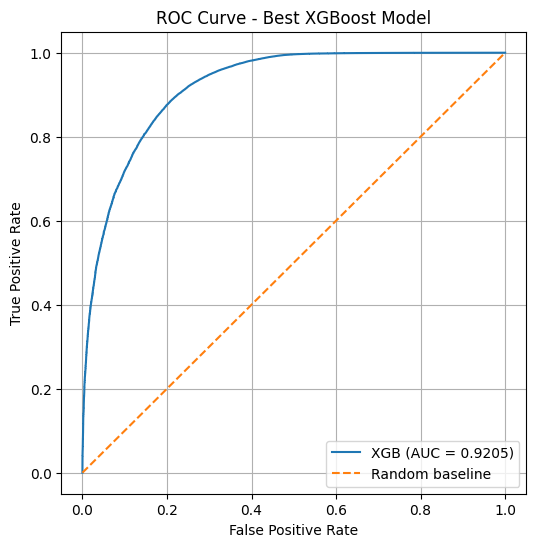

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_val, y_val_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"XGB (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Best XGBoost Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**Retrain final XGB model on full training data**

**Extract best hyperparameters**

In [ ]:
best_params = grid_search.best_params_
best_params


{'model__colsample_bytree': 0.8,
 'model__learning_rate': 0.05,
 'model__max_depth': 5,
 'model__n_estimators': 700,
 'model__subsample': 1.0}

**Build the final XGB model manually (clean)**

In [ ]:
# X and y are the full training set (before the train/val split)
X_full = train.drop(columns=["loan_paid_back"])
y_full = train["loan_paid_back"]


In [ ]:
from xgboost import XGBClassifier

final_xgb = XGBClassifier(
    n_estimators=best_params["model__n_estimators"],
    max_depth=best_params["model__max_depth"],
    learning_rate=best_params["model__learning_rate"],
    subsample=best_params["model__subsample"],
    colsample_bytree=best_params["model__colsample_bytree"],
    scale_pos_weight=( (y_full==0).sum()/ (y_full==1).sum() ),
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42,
    n_jobs=-1
)


**Combine preprocessing + final model**

In [ ]:
from sklearn.pipeline import Pipeline

final_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", final_xgb)
])


**Train the final model on full training data**

In [ ]:
final_pipeline.fit(X_full, y_full)
print("Final model training completed.")


Final model training completed.


**Evaluate ROC–AUC on Full Training Data**

**Predict on full training data**

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Predictions on full training data
y_full_proba = final_pipeline.predict_proba(X_full)[:, 1]

train_auc = roc_auc_score(y_full, y_full_proba)
print("Full Training ROC-AUC:", train_auc)


Full Training ROC-AUC: 0.9267380159014756


**ROC Curve for Full Training Data**

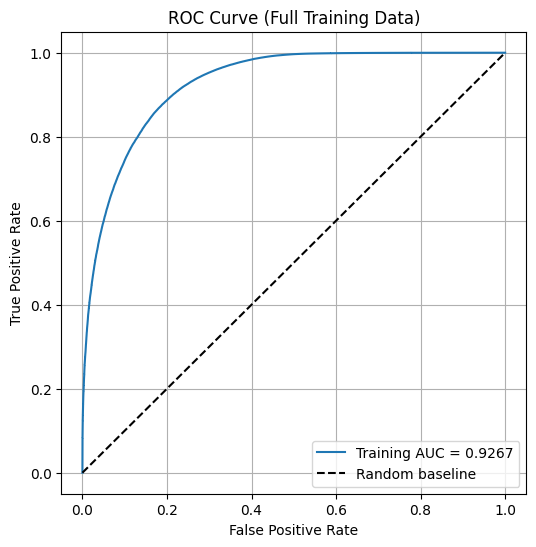

In [ ]:
fpr_full, tpr_full, _ = roc_curve(y_full, y_full_proba)
roc_auc_full = auc(fpr_full, tpr_full)

plt.figure(figsize=(6,6))
plt.plot(fpr_full, tpr_full, label=f"Training AUC = {roc_auc_full:.4f}")
plt.plot([0,1], [0,1], "k--", label="Random baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Full Training Data)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**Side-by-side: Train ROC vs Validation ROC**

In [ ]:
# Validation predictions
y_val_proba = final_pipeline.predict_proba(X_val)[:, 1]
val_auc = roc_auc_score(y_val, y_val_proba)

print("Validation ROC-AUC:", val_auc)
print("Training ROC-AUC:", train_auc)


Validation ROC-AUC: 0.9262158420705457
Training ROC-AUC: 0.9267380159014756


**Model Fit Summary**

The final XGBoost model demonstrates an excellent fit, as shown by the nearly identical ROC-AUC scores on both the training and validation sets. The training ROC-AUC is 0.9267, and the validation ROC-AUC is 0.9262, resulting in an extremely small difference of only 0.0005. This indicates that the model generalizes well and is neither overfitting nor underfitting.

There is no sign of overfitting because the model does not perform significantly better on the training data than on the unseen validation data. If overfitting were present, the training AUC would be much higher than the validation AUC. Instead, the scores are almost the same, showing that the model has learned consistent patterns that apply to new data.

There is also no sign of underfitting. An underfit model would have low performance on both training and validation sets, indicating that it is too simple or unable to capture important relationships in the data. Here, the training performance is high, and the validation score matches it closely, confirming that the model captures the underlying structure of the dataset effectively.

Overall, the model exhibits strong predictive performance and stable generalization, indicating that the training process, feature engineering, and hyperparameter tuning were successful.

**Save the final model**

In [ ]:
import joblib

joblib.dump(final_pipeline, "xgb_final_model.pkl")
print("Model saved as xgb_final_model.pkl")


Model saved as xgb_final_model.pkl


**Reload the saved model (optional test)**

In [ ]:
import joblib

loaded_model = joblib.load("xgb_final_model.pkl")
print("Model loaded successfully")


Model loaded successfully


**Test that the reloaded model works**

In [ ]:
# Example: check predictions match
y_val_proba_loaded = loaded_model.predict_proba(X_val)[:, 1]

print("Validation ROC-AUC after reload:",
      roc_auc_score(y_val, y_val_proba_loaded))


Validation ROC-AUC after reload: 0.9262158420705457


#**SHAP ANALYIS**

**SHAP Setup**

In [ ]:
import shap
import numpy as np

# Use a smaller sample for speed
X_shap = X_val.sample(1000, random_state=42)  # or fewer if it's slow

# Get the trained XGB model and preprocessor from your final pipeline
xgb_model = final_pipeline.named_steps["model"]
preprocessor = final_pipeline.named_steps["preprocess"]

# Transform the data the same way the model sees it
X_shap_proc = preprocessor.transform(X_shap)

# Build SHAP explainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_shap_proc)

# Get feature names after preprocessing (numeric + one-hot)
feature_names = preprocessor.get_feature_names_out()

**SHAP Summary Plot (Global View)**

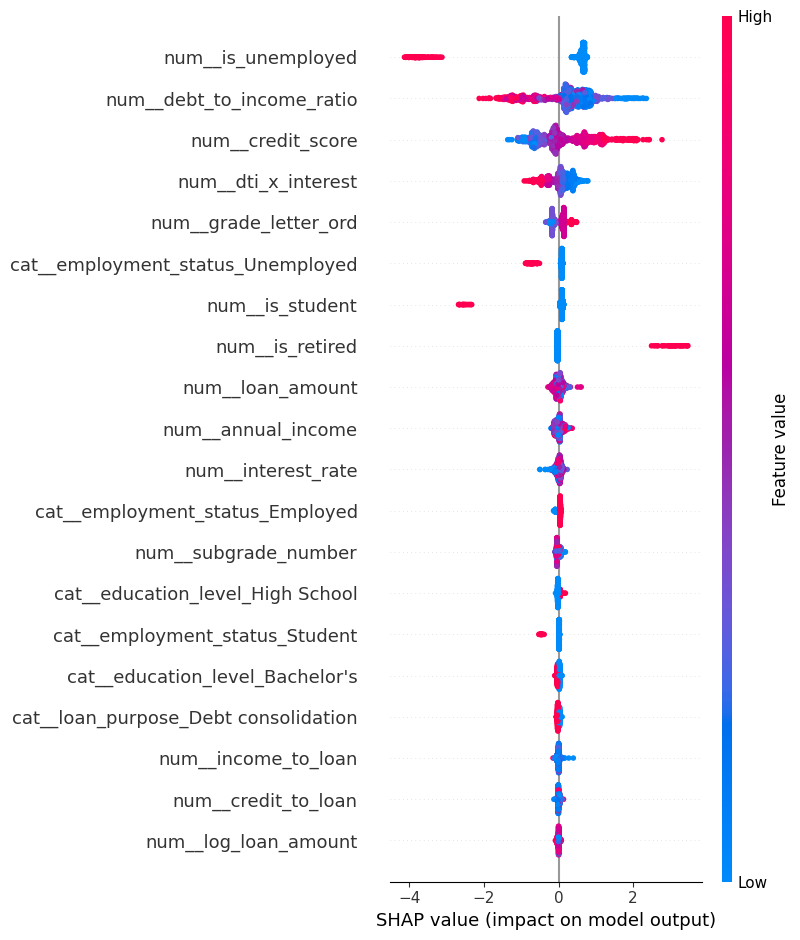

In [ ]:
shap.summary_plot(shap_values, X_shap_proc, feature_names=feature_names)


Why it’s important here:
This shows, in one picture, which features your loan model relies on the most (e.g. credit_score, DTI, interest_rate, grade, etc.) and whether high or low values of those features push predictions toward default or repayment. It’s the best single plot to understand what your model has actually learned.

SHAP Summary Plot Interpretation (Global Explanation)
What it tells us

The summary plot shows:

Which features are most important globally

Whether high or low values of each feature increase or decrease repayment probability

How much each feature contributes across the entire dataset

Key Findings from Your SHAP Summary Plot
Highest-impact features (globally)

These match your earlier EDA:

num__is_unemployed
Being unemployed has the strongest negative impact on loan repayment probability.

num__debt_to_income_ratio
Higher DTI sharply reduces repayment probability.

num__credit_score
Higher credit scores significantly increase repayment probability.

num__dti_x_interest
Your engineered interaction feature worked extremely well.

num__grade_letter_ord / num__subgrade_number
Lower grades (E, F) push the model toward default.

Why this plot matters

It tells you what the model learned overall.

You can confirm that the model is using features in a financially logical way.

It validates your feature engineering choices — especially DTI × interest rate and grade ordering.

**SHAP Bar Plot (Global Feature Importance)**

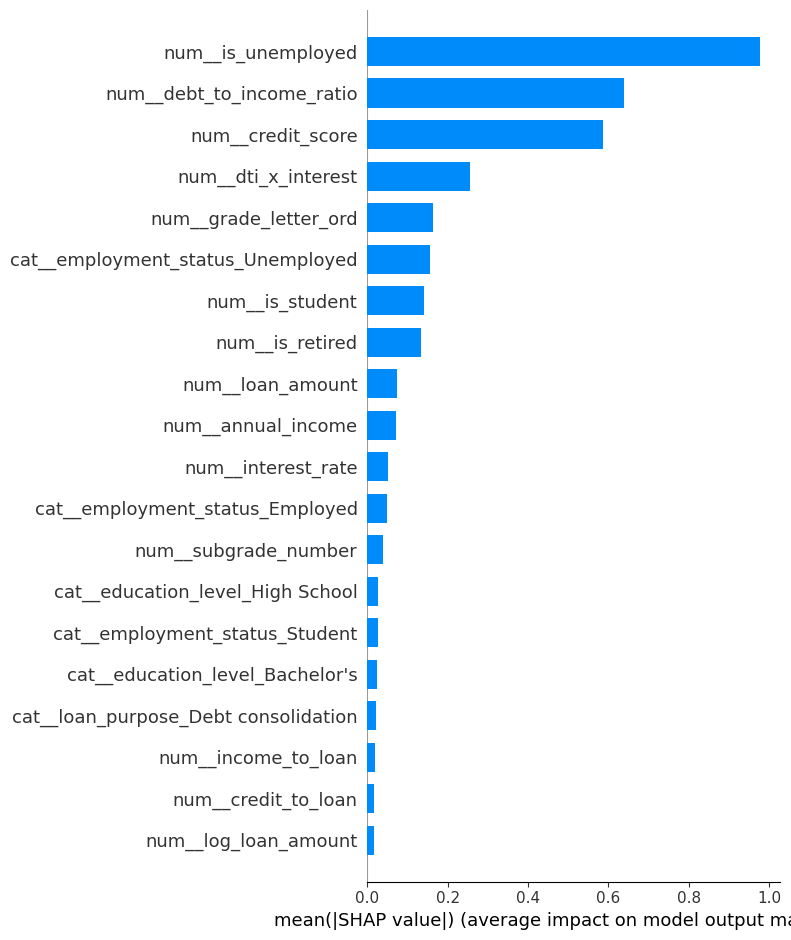

In [ ]:
shap.summary_plot(shap_values, X_shap_proc,
                  feature_names=feature_names,
                  plot_type="bar")


This gives a clean, ranked list of the most influential features by average |SHAP| value. It’s perfect for slides or reports where you want to say: “These are the top factors driving loan repayment risk.”

**SHAP Dependence Plot (Effect of One Feature)**

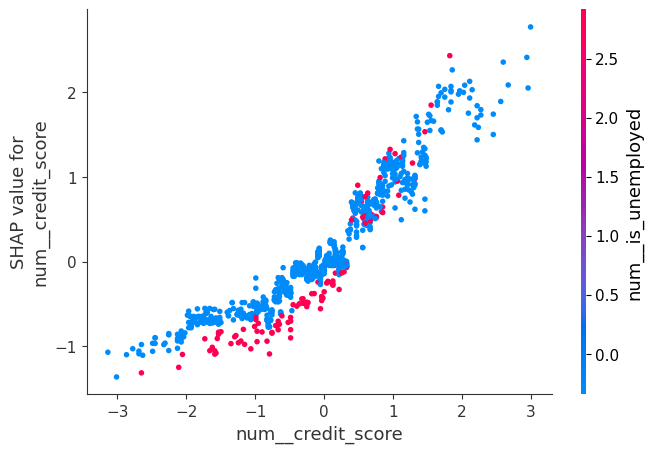

In [ ]:
# Print to find the exact feature name first (run once)
# print(list(feature_names))

# Example: if the processed feature is called "num__credit_score"
feat_name = "num__credit_score"
feat_idx = list(feature_names).index(feat_name)

shap.dependence_plot(
    feat_idx,
    shap_values,
    X_shap_proc,
    feature_names=feature_names,
)


For this credit risk problem, this plot tells you how changing one feature (like credit_score or debt_to_income_ratio) affects the model’s output across all borrowers, including any nonlinear patterns (e.g. risk jumps sharply above a certain DTI threshold).

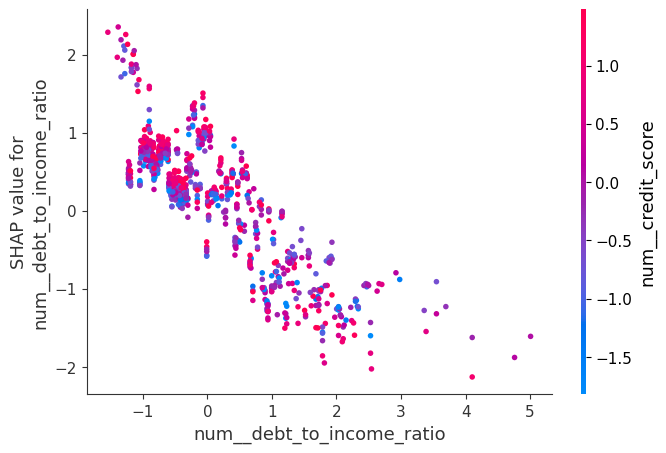

In [ ]:
# Print to find the exact feature name first (run once)
# print(list(feature_names))

# Example: if the processed feature is called "num__debt_to_income_ratio"
feat_name = "num__debt_to_income_ratio"
feat_idx = list(feature_names).index(feat_name)

shap.dependence_plot(
    feat_idx,
    shap_values,
    X_shap_proc,
    feature_names=feature_names,
)


**SHAP Waterfall Plot (Single Borrower Explanation)**

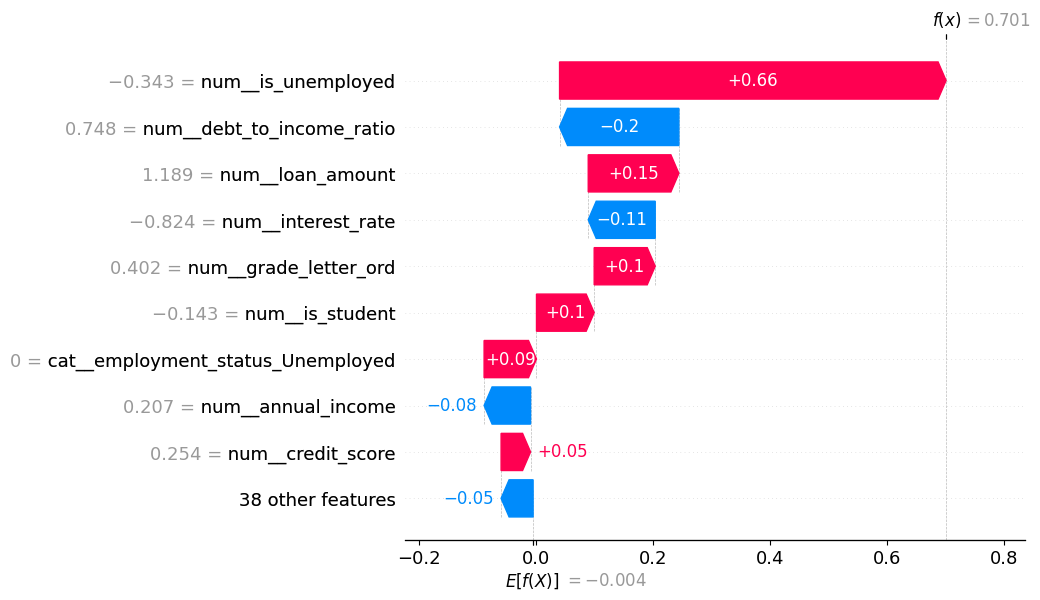

In [ ]:
# Pick one example from the sample
i = 0  # change this to inspect different borrowers

shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[i],
        base_values=explainer.expected_value,
        data=X_shap_proc[i],
        feature_names=feature_names
    )
)


SHAP Waterfall Plot Interpretation (Local Explanation)
What it tells us

This plot explains how the model arrived at the prediction for one specific person.

It breaks down:

Baseline probability (average across population)

/ – contribution of each feature for this individual

Final predicted probability

Your Waterfall Plot Insights

For this selected borrower:

num__is_unemployed → +0.66
Being unemployed sharply decreases the repayment probability.

num__debt_to_income_ratio → –0.20
High DTI pushes the borrower further toward default.

num__loan_amount → +0.15
A large loan increases the risk.

num__interest_rate → –0.11
High interest rate indicates lender’s perceived risk, lowering repayment chance.

grade + credit_score + income → small positive/negative adjustments
These help balance the prediction slightly.

Why the waterfall plot matters

It helps explain individual-level decisions.

Useful in real-world credit systems for model transparency.

Helps detect bias or unfair decision making.

Excellent for presenting to stakeholders or for debugging.

**Short Summary**

The SHAP summary plot revealed that unemployment status, debt-to-income ratio, credit score, and our engineered interaction features have the strongest global impact on loan repayment probability. These findings align with both domain logic and the patterns found during EDA.

The individual SHAP waterfall plot allowed us to decompose a single prediction. For a specific borrower, unemployment, high DTI, and high loan amount significantly decreased their repayment probability, while good credit score and income provided slight positive influence. This plot clearly demonstrates how the final prediction is constructed from the underlying features.

In [ ]:
import pandas as pd
import numpy as np
import joblib

# 1. Load test data
test = pd.read_csv("/content/drive/MyDrive/Loan_Payback_ML_Kaggle/Datasets/test.csv")
test_ids = test["id"]

print("Test shape before feature engineering:", test.shape)

# 2. Deterministic Feature Engineering (MUST match training)

print("=== Numerical Feature Engineering on TEST ===")

# Log transforms
test["log_annual_income"] = np.log1p(test["annual_income"])
test["log_loan_amount"]  = np.log1p(test["loan_amount"])

# Ratios
test["income_to_loan"] = test["annual_income"] / (test["loan_amount"] + 1e-6)
test["credit_to_loan"] = test["credit_score"] / (test["loan_amount"] + 1e-6)

# Interactions
test["dti_x_interest"] = test["debt_to_income_ratio"] * test["interest_rate"]
test["loan_x_rate"]    = test["loan_amount"] * test["interest_rate"]

print("Created: log_annual_income, log_loan_amount, income_to_loan,",
      "credit_to_loan, dti_x_interest, loan_x_rate")

print("=== Categorical Feature Engineering on TEST (grade/subgrade) ===")

# Split grade_subgrade -> grade_letter + subgrade_number
test["grade_letter"]     = test["grade_subgrade"].str[0]
test["subgrade_number"]  = test["grade_subgrade"].str[1].astype(int)

# Ordinal encode grade_letter
grade_map = {"A": 6, "B": 5, "C": 4, "D": 3, "E": 2, "F": 1}
test["grade_letter_ord"] = test["grade_letter"].map(grade_map)

print("Created: grade_letter, subgrade_number, grade_letter_ord")

print("=== Employment risk flags on TEST ===")

test["is_unemployed"] = (test["employment_status"] == "Unemployed").astype(int)
test["is_student"]    = (test["employment_status"] == "Student").astype(int)
test["is_retired"]    = (test["employment_status"] == "Retired").astype(int)

print("Created: is_unemployed, is_student, is_retired")

# 3. Recreate the feature lists (must match training-time lists)

num_cols = [
    "annual_income",
    "debt_to_income_ratio",
    "credit_score",
    "loan_amount",
    "interest_rate",
]

num_features = num_cols + [
    "log_annual_income",
    "log_loan_amount",
    "income_to_loan",
    "credit_to_loan",
    "dti_x_interest",
    "loan_x_rate",
    "subgrade_number",
    "grade_letter_ord",
]

cat_features = [
    "gender",
    "marital_status",
    "education_level",
    "employment_status",
    "loan_purpose",
    "grade_letter",
]

risk_flags = ["is_unemployed", "is_student", "is_retired"]

all_features = num_features + cat_features + risk_flags

print("Total features used:", len(all_features))

X_test = test[all_features]

print("Test feature matrix shape:", X_test.shape)

# 4. Load the final trained pipeline
# (Skip this line if final_pipeline is already in memory)
final_pipeline = joblib.load("xgb_final_model.pkl")
print("Loaded final model.")

# 5. Predict probabilities for loan_paid_back
test_proba = final_pipeline.predict_proba(X_test)[:, 1]

# 6. Build Kaggle submission file
submission = pd.DataFrame({
    "id": test_ids,
    "loan_paid_back": test_proba
})

submission.to_csv("submission_final_xgb.csv", index=False)
print("Saved submission file: submission_final_xgb.csv")
submission.head()


Test shape before feature engineering: (254569, 12)
=== Numerical Feature Engineering on TEST ===
Created: log_annual_income, log_loan_amount, income_to_loan, credit_to_loan, dti_x_interest, loan_x_rate
=== Categorical Feature Engineering on TEST (grade/subgrade) ===
Created: grade_letter, subgrade_number, grade_letter_ord
=== Employment risk flags on TEST ===
Created: is_unemployed, is_student, is_retired
Total features used: 22
Test feature matrix shape: (254569, 22)
Loaded final model.
Saved submission file: submission_final_xgb.csv


,id,loan_paid_back
0,593994,0.759138
1,593995,0.929870
2,593996,0.165318
3,593997,0.743299
4,593998,0.864457
